In [58]:
from bs4 import BeautifulSoup
import requests

In [59]:
index = [0, 12, 24, 26, 48, 60, 72]

title = []
desc = []
price = []
branch = []

for i in index:
    url = f"https://www.rightmove.co.uk/property-for-sale/find.html?locationIdentifier=REGION%5E61521&maxPrice=110000&index={i}&propertyTypes=&includeSSTC=false&mustHave=&dontShow=retirement%2CsharedOwnership&furnishTypes=&keywords="
    pageres = requests.get(url)
    soup = BeautifulSoup(pageres.content, 'html.parser')

    items = soup.find_all('div', {'class': 'l-searchResult is-list'})
    if len(items) == 0:
        break

    for item in items:
        title.append(item.find('h2', {'class': 'propertyCard-title'}).get_text())
        desc.append(item.find('div', {'class': 'propertyCard-description'}).get_text())
        price.append(item.find('div', { 'class': 'propertyCard-priceValue'}).get_text())
        branch.append(item.find('img', {'class': 'propertyCard-branchLogo-image'})['alt'])

In [60]:
import pandas as pd

df = pd.DataFrame({"title": title, "description": desc, "price": price, "branch": branch})

<AxesSubplot:>

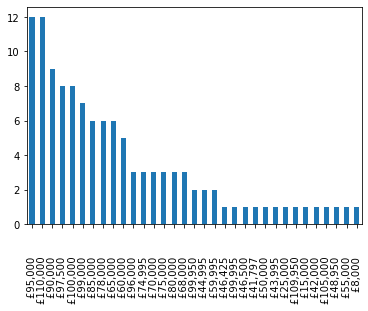

In [61]:
df['price'].value_counts().plot(kind='bar')

In [62]:
def format_title(title):
    return title.replace("\n", "")

df['title'] = df['title'].apply(format_title)

<AxesSubplot:>

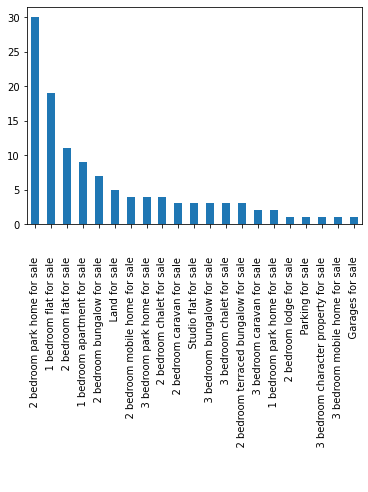

In [63]:
df['title'].value_counts().plot(kind='bar')

In [64]:
def format_desc(desc):
    return desc.replace('\n', "")
    
df['description'] = df['description'].apply(format_desc)

In [65]:
def format_price(price):
   price = price[1:]
   return price.replace(',', '')

df['price'] = df['price'].apply(format_price)

In [73]:
df['price'] = df['price'].astype(float)

In [67]:
df.groupby('branch')['title'].count()

branch
Auction Property Ltd, London Logo                        1
Draycott Real estate, Uttoxeter Logo                    26
Fox & home, Isle of Wight Logo                           1
Gurnard Pines Sales and Lettings Limited, Cowes Logo    17
Harvey Longsons, Swaffham Logo                           5
Hose Rhodes Dickson, Ryde Logo                           1
Hose Rhodes Dickson, Shanklin Logo                       8
Hose Rhodes Dickson, Ventnor Logo                        1
Pittis, Cowes Logo                                       1
Pittis, Freshwater Logo                                  3
Pittis, Ryde Logo                                        1
Pittis, Ventnor Logo                                     2
Purplebricks, covering Portsmouth Logo                   5
Red Squirrel Property Shop, Newport Logo                 7
Seafields Estates, Ryde Logo                             3
Sell My Group, Lytham Logo                               2
Simply Bungalows, Cowes Logo                     

In [77]:
df.sort_values(by='price')

,title,description,price,branch
116,Parking for sale,A truly rare opportunity to purchase a very so...,8000.0,"The Wright Estate Agency, East Cowes Logo"
115,Garages for sale,AVAILABLE IMMEDIATELY! Is this en-bloc garage ...,15000.0,"Red Squirrel Property Shop, Newport Logo"
114,Land for sale,FOR SALE BY ONLINE AUCTION ON 15 FEBRUARY 2022...,25000.0,"Auction Property Ltd, London Logo"
113,2 bedroom caravan for sale,A.B.I Summer BreezeSize: 12 ft x 36 ftYear: 20...,41797.0,"Harvey Longsons, Swaffham Logo"
112,2 bedroom mobile home for sale ...,This very well presented park home comes compl...,42000.0,"Watson Bull & Porter, Ryde Logo"
...,...,...,...,...
3,2 bedroom flat for sale,A choice of 5 apartments which are almost read...,110000.0,"Watson Bull & Porter, Newport Logo"
2,2 bedroom flat for sale,A choice of 5 apartments which are almost read...,110000.0,"Watson Bull & Porter, Newport Logo"
1,2 bedroom flat for sale,A choice of 5 apartments which are almost read...,110000.0,"Watson Bull & Porter, Newport Logo"
25,3 bedroom bungalow for sale,"£110,000 AFFORDABLE PROPERTIES IN THE ISLE O...",110000.0,"Gurnard Pines Sales and Lettings Limited, Cowe..."
